# **데이터 불러오기 / 전처리 및 병합**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ace_tools  # Install the missing ace_tools library

In [58]:
import pandas as pd
# 업로드된 최신화된 데이터 로드
flight= '/content/drive/MyDrive/[프로젝트]Timeseries_2025/flight_stats_2001_2025_monthly.csv'

# CSV 파일 로드
flight = pd.read_csv(flight)

# 상위 몇 줄 확인
flight.tail(100)


,airline,airlineCode,arrFlights,depFlights,flights,year,month
6494,전일본공수,NH,26,26,52,2024,12
6495,제주항공,7C,51,51,102,2024,12
6496,중국센트럴항공,I9,19,19,38,2024,12
6497,중국우정항공,CF,13,13,26,2024,12
6498,중국화물항공,CK,13,13,26,2024,12
...,...,...,...,...,...,...,...
6589,칼리타항공,K4,81,82,163,2025,3
6590,캐세이퍼시픽항공,CX,10,10,20,2025,3
6591,터키항공,TK,8,8,16,2025,3
6592,투르크메니스탄,T5,5,5,10,2025,3


In [4]:
# 연도와 월을 기준으로 날짜 컬럼 생성
flight['date'] = pd.to_datetime(flight['year'].astype(str) + '-' + flight['month'].astype(str) + '-01')

# 월별 전체 출발편 수 집계
monthly_dep = flight.groupby('date')['depFlights'].sum().reset_index()


In [5]:
import pandas as pd
# 업로드된 최신화된 데이터 로드
exchange_rate = '/content/drive/MyDrive/[프로젝트]Timeseries_2025/USD_KRW 월별 데이터.csv'

# CSV 파일 로드
exchange_rate = pd.read_csv(exchange_rate)

# 상위 몇 줄 확인
exchange_rate.head(20)

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2025- 04- 01,"1,438.49","1,473.05","1,487.48","1,413.29",NaN,-2.28%
1,2025- 03- 01,"1,472.05","1,461.80","1,477.32","1,437.80",NaN,0.74%
2,2025- 02- 01,"1,461.28","1,462.98","1,473.50","1,423.97",NaN,0.38%
3,2025- 01- 01,"1,455.70","1,478.25","1,478.25","1,426.14",NaN,-1.43%
4,2024- 12- 01,"1,476.78","1,395.96","1,487.37","1,395.52",NaN,5.89%
5,2024- 11- 01,"1,394.67","1,373.79","1,411.95","1,368.59",NaN,1.61%
6,2024- 10- 01,"1,372.58","1,317.55","1,394.18","1,315.57",NaN,4.22%
7,2024- 09- 01,"1,317.01","1,337.57","1,348.53","1,302.94",NaN,-1.46%
8,2024- 08- 01,"1,336.56","1,367.69","1,379.79","1,316.94",NaN,-2.38%
9,2024- 07- 01,"1,369.08","1,381.28","1,392.65","1,366.79",NaN,-0.84%


In [59]:
# 공백 제거 및 날짜 변환
exchange_rate['날짜'] = exchange_rate['날짜'].str.replace(' ', '')
exchange_rate['date'] = pd.to_datetime(exchange_rate['날짜'], format='%Y-%m-%d')

# 종가를 float로 변환
exchange_rate['종가'] = exchange_rate['종가'].replace(',', '', regex=True).astype(float)

# 필요한 열만 추출
exchange_monthly = exchange_rate[['date', '종가']]

In [60]:
# 두 데이터 병합
final_df = pd.merge(monthly_dep, exchange_monthly, on='date', how='inner')

# 결과 확인
print(final_df.head())


        date  depFlights      종가
0 2003-03-01         894  1251.0
1 2003-04-01         919  1214.5
2 2003-05-01         931  1209.0
3 2003-06-01         959  1195.0
4 2003-07-01        1003  1180.5


In [61]:
import pandas as pd
# 업로드된 최신화된 데이터 로드
flight= '/content/drive/MyDrive/[프로젝트]Timeseries_2025/GDP(2003-2024).xlsx'

# CSV 파일 로드
flight = pd.read_excel(flight)

# 상위 몇 줄 확인
flight.head(100)


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,통계표명:,명목 및 실질 국내총생산,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,단위:,조 원,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
2,명목 국내총생산,868.1,942.9,995.2,"1,045.7","1,134.5","1,203.0","1,255.3","1,379.5","1,448.6",...,"1,740.8","1,833.0","1,934.2","2,007.0","2,040.6","2,058.5","2,221.9","2,323.8","2,401.2","2,549.1"
3,실질 국내총생산,"1,161.1","1,221.2","1,274.5","1,341.3","1,419.7","1,462.3","1,474.3","1,577.3","1,635.4",...,"1,840.2","1,898.6","1,963.7","2,026.1","2,073.0","2,058.5","2,153.4","2,212.2","2,243.2","2,288.6"
4,출처:,"한국은행, 「국민계정」",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,"＊자료 : 한국은행, 「국민계정」 각 연도",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,주석:,1) 실질 국내총생산은 2020년 불변가격 기준임.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,2) 2023년 이후는 잠정치임.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
import pandas as pd

# 실질 GDP 데이터프레임 생성
real_gdp_df = pd.DataFrame({
    'year': [
        2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
        2019, 2020, 2021, 2022, 2023, 2024
    ],
    'real_gdp': [
        1161.1, 1221.2, 1274.5, 1341.3, 1419.7, 1462.3,
        1474.3, 1577.3, 1635.4, 1708.1, 1753.2, 1800.3,
        1840.2, 1898.6, 1963.7, 2026.1, 2073.0, 2058.5,
        2153.4, 2212.2, 2243.2, 2288.6
    ]
})


In [63]:
# 두 데이터 병합
final_df = pd.merge(monthly_dep, exchange_monthly, on='date', how='inner')

# 결과 확인
print(final_df.head())


        date  depFlights      종가
0 2003-03-01         894  1251.0
1 2003-04-01         919  1214.5
2 2003-05-01         931  1209.0
3 2003-06-01         959  1195.0
4 2003-07-01        1003  1180.5


In [47]:
# 중복된 GDP 관련 컬럼 제거
final_df = final_df.drop(columns=[col for col in final_df.columns if 'real_gdp' in col])

# 날짜를 datetime 형식으로 변환 (이미 되어 있으면 생략 가능)
final_df['date'] = pd.to_datetime(final_df['date'])

# 연도 추출
final_df['year'] = final_df['date'].dt.year

# 다시 병합
final_df = pd.merge(final_df, real_gdp_df, on='year', how='left')

# 병합 후 year 컬럼 정리
final_df.drop(columns='year', inplace=True)

# 결과 확인
print(final_df.tail())


     index       date  depFlights       종가  linear_gdp  real_gdp
260    260 2024-11-01        1976  1394.67      2288.6    2288.6
261    261 2024-12-01        2019  1476.78      2288.6    2288.6
262    262 2025-01-01        1785  1455.70      2288.6       NaN
263    263 2025-02-01        1502  1461.28      2288.6       NaN
264    264 2025-03-01        1872  1472.05      2288.6       NaN


In [64]:
final_df

,date,depFlights,종가
0,2003-03-01,894,1251.00
1,2003-04-01,919,1214.50
2,2003-05-01,931,1209.00
3,2003-06-01,959,1195.00
4,2003-07-01,1003,1180.50
...,...,...,...
260,2024-11-01,1976,1394.67
261,2024-12-01,2019,1476.78
262,2025-01-01,1785,1455.70
263,2025-02-01,1502,1461.28


# 재진행 해보겠삼(변수 gdp추가해서)

In [12]:
# 외생 변수에서 NaN, inf 확인
#결측치 처리
import numpy as np

print(final_df[['종가', 'real_gdp']].isna().sum())
print(np.isinf(final_df[['종가', 'real_gdp']]).sum())


종가          0
real_gdp    3
dtype: int64
종가          0
real_gdp    0
dtype: int64


In [13]:
#선형 보간법으로 gdp 결측치 처리.
final_df['real_gdp'] = final_df['real_gdp'].interpolate(method='linear')


In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 종속 변수와 외생 변수
y = final_df['depFlights']
exog = final_df[['종가', 'real_gdp']]

# 모델 학습
model = SARIMAX(y, exog=exog, order=(2,1,0), seasonal_order=(1,0,1,12))
model_fit = model.fit()
print(model_fit.summary())


                                      SARIMAX Results                                       
Dep. Variable:                           depFlights   No. Observations:                  265
Model:             SARIMAX(2, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1459.630
Date:                              Wed, 11 Jun 2025   AIC                           2933.260
Time:                                      08:47:14   BIC                           2958.291
Sample:                                           0   HQIC                          2943.318
                                              - 265                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
종가             0.1165      0.079      1.482      0.138      -0.038       0.271
real_gdp       0.94

### 위 결과를 보면 환율은 p값이 높아 유의하지 않음. 하지만 gdp는 p값이 0.022로 유의하다.

#그래서 환율 데이터 제거한 gdp와 flight로만 모델 재생성


In [15]:
#그래서 환율 데이터 제거한 gdp와 flight로만 모델 재생성
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 종가 제거한 exog 데이터
exog_vars = final_df[['real_gdp']].copy()
exog_vars = exog_vars.fillna(method='ffill')  # NaN 처리

# 모델 정의
model = SARIMAX(final_df['depFlights'],
                exog=exog_vars,
                order=(2,1,0), #차분
                seasonal_order=(1,0,[1],12))

model_fit = model.fit()
print(model_fit.summary())


<ipython-input-15-2139742856>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exog_vars = exog_vars.fillna(method='ffill')  # NaN 처리


                                      SARIMAX Results                                       
Dep. Variable:                           depFlights   No. Observations:                  265
Model:             SARIMAX(2, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1460.547
Date:                              Wed, 11 Jun 2025   AIC                           2933.095
Time:                                      08:47:20   BIC                           2954.551
Sample:                                           0   HQIC                          2941.717
                                              - 265                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
real_gdp       0.8774      0.411      2.135      0.033       0.072       1.683
ar.L1         -0.37

real_gdp는 연속적으로 천천히 증가하는 추세를 가진 지표이므로, 예측에 있어서 일정한 추세가 오히려 도움이 될 수 있음.
따라서 flight만 order(2,1,0)으로 차분 진행함

### mae,rmse 성능 *이탤릭체 텍스트*

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 예측값과 실제값
pred = model_fit.fittedvalues
actual = final_df['depFlights']

# MAE, RMSE
mae = mean_absolute_error(actual, pred)
rmse = np.sqrt(mean_squared_error(actual, pred))



print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 46.34
RMSE: 61.07


| 지표       | 의미                         | 해석                                                |
| -------- | -------------------------- | ------------------------------------------------- |
| **MAE**  | 예측값과 실제값 차이의 평균 (절댓값 기준)   | 예측이 실제 depFlights 값에서 평균적으로 약 **46명** 정도 벗어남      |
| **RMSE** | 오차 제곱 평균의 제곱근 (큰 오차에 더 민감) | 예측이 실제보다 평균적으로 약 **61명** 정도 오차가 있음 (큰 오차에 가중치 있음) |


In [17]:
#인덱스 고치기
print("actual.index 타입:", type(actual.index))
print("pred.index 타입:", type(pred.index))

print("actual.index 예시:", actual.index[:5])
print("pred.index 예시:", pred.index[:5])


actual.index 타입: <class 'pandas.core.indexes.range.RangeIndex'>
pred.index 타입: <class 'pandas.core.indexes.range.RangeIndex'>
actual.index 예시: RangeIndex(start=0, stop=5, step=1)
pred.index 예시: RangeIndex(start=0, stop=5, step=1)


In [18]:
actual_reset = actual.reset_index(drop=True)
pred_reset = pred.reset_index(drop=True)

# 0, nan, inf 필터링
mask = (actual_reset != 0) & (~actual_reset.isna()) & (~pred_reset.isna()) & (~np.isinf(actual_reset)) & (~np.isinf(pred_reset))

actual_filtered = actual_reset[mask]
pred_filtered = pred_reset[mask]

mape = np.mean(np.abs((actual_filtered - pred_filtered) / actual_filtered)) * 100
print(f"MAPE (인덱스 리셋 후): {mape:.2f}%")


MAPE (인덱스 리셋 후): 3.56%


MAPE (평균 절대 퍼센트 오차)
— 오차를 실제 값 대비 %로 표현해서 상대적 정확도를 보여줌.
— 3.56%면, 예측이 평균적으로 실제 값 대비 약 3.5% 오차가 있다는 의미로, 꽤 정확한 편.

## 예측 시각화

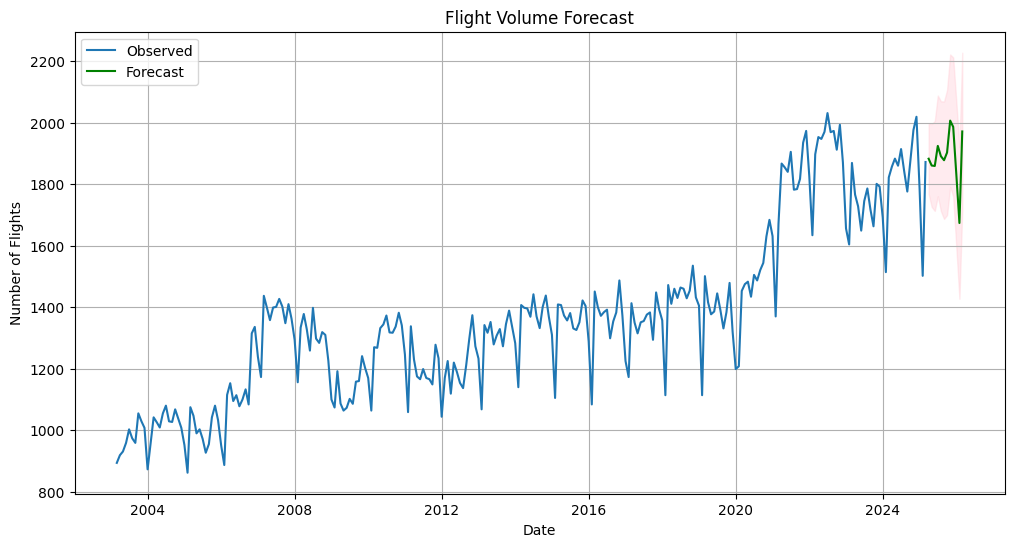

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 마지막 날짜 가져오기
last_date = final_df['date'].iloc[-1]

# 미래 12개월 날짜 생성
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='MS')

# 예측용 future_exog 정의 (GDP 예측값 또는 시나리오)
# Using a more realistic range of GDP values based on the real_gdp column
future_exog = pd.DataFrame({
    'real_gdp': [final_df['real_gdp'].iloc[-1] + i*10 for i in range(1, 13)] # Assuming a slight increase
}, index=future_dates)


# 예측 수행
forecast = model_fit.get_forecast(steps=12, exog=future_exog)
pred_mean = forecast.predicted_mean
pred_ci = forecast.conf_int()

# 인덱스 맞추기
pred_mean.index = future_dates
pred_ci.index = future_dates

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(final_df['date'], final_df['depFlights'], label='Observed')
plt.plot(pred_mean.index, pred_mean, label='Forecast', color='green')
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title("Flight Volume Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Flights")
plt.grid(True)
plt.show()

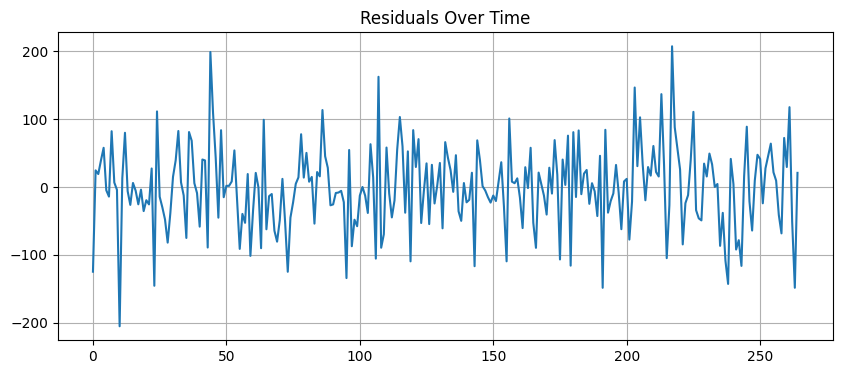

In [20]:
residuals = final_df['depFlights'] - model_fit.fittedvalues
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals Over Time')
plt.grid(True)
plt.show()


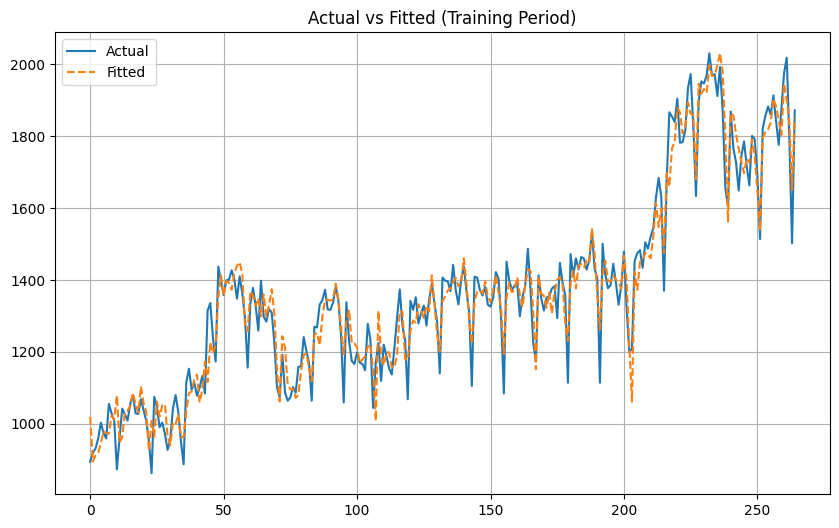

In [21]:
plt.figure(figsize=(10,6))
plt.plot(final_df.index, final_df['depFlights'], label='Actual')
plt.plot(final_df.index, model_fit.fittedvalues, label='Fitted', linestyle='--')
plt.title('Actual vs Fitted (Training Period)')
plt.legend()
plt.grid(True)
plt.show()


# +**[예정]**향후계획 추가 분석[gdp선형 보간법을 이용한 예측 재수행]